In [35]:
#import libraries
#data wrangling
import pandas as pd
import numpy as np

#datetime
import datetime as dt

#visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
df_transactions = pd.read_excel("KPMG.xlsx", sheet_name="Transactions")
print("The first 5 rows of transactions sheet:","\n",df_transactions.head(5))

The first 5 rows of transactions sheet: 
    transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost product_first_sold_da

In [37]:
# in ra info bảng
print(df_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [38]:
# describe default
df_transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [39]:
# describe các biến object
df_transactions.describe(include=[object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [40]:
# describe all
df_transactions.describe(include="all", datetime_is_numeric=True)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,2004-07-31 18:38:13.834267392
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,1991-01-21 00:00:00
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,1997-08-25 00:00:00
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,2004-08-17 00:00:00
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,2011-05-09 00:00:00
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,2016-12-06 00:00:00


In [41]:
# count số dòng bị null ở mỗi cột
df_transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [42]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_transactions_dropna_all = df_transactions.dropna()
print(df_transactions_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [43]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = df_transactions.dropna(subset="online_order")
print(df_dropna_online_order.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [44]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = df_transactions.fillna(0)
print(df_fillna_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [45]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = df_transactions.fillna(method = "ffill")
print(df_fillna_ffill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [46]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = df_transactions.fillna(method = "bfill")
print(df_fillna_bfill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [47]:
# load sheet Demographic và hiển thị top head
df_demographic = pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")
print("The first few rows of demographic sheet:","\n",df_demographic.head())


The first few rows of demographic sheet: 
    customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer   

/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/3715186689.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_demographic = pd.read_excel("KPMG.xlsx", sheet_name="CustomerDemographic")


In [48]:
# in ra info bảng
print(df_demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [49]:
# describe các giá trị object
df_demographic.describe(include=[object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [50]:
# Remove all NA rows, then use output for the following steps
df_demographic_dropna_all = df_demographic.dropna()
print(df_demographic_dropna_all.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2630 entries, 0 to 3996
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2630 non-null   int64         
 1   first_name                           2630 non-null   object        
 2   last_name                            2630 non-null   object        
 3   gender                               2630 non-null   object        
 4   past_3_years_bike_related_purchases  2630 non-null   int64         
 5   DOB                                  2630 non-null   datetime64[ns]
 6   job_title                            2630 non-null   object        
 7   job_industry_category                2630 non-null   object        
 8   wealth_segment                       2630 non-null   object        
 9   deceased_indicator                   2630 non-null   object        
 10  default     

In [51]:
# In ra các giá trị unique của cột gender
print("The unique values of gender column:",df_demographic_dropna_all["gender"].unique())

The unique values of gender column: ['F' 'Male' 'Female' 'Femal']


In [52]:
# Quy chuẩn cột gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
df_demographic_dropna_all["gender"]=df_demographic_dropna_all["gender"].replace(["F","Femal"],"Female")
print("The unique values of gender column after modification:",df_demographic_dropna_all["gender"].unique())

The unique values of gender column after modification: ['Female' 'Male']


/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/2375057874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic_dropna_all["gender"]=df_demographic_dropna_all["gender"].replace(["F","Femal"],"Female")


In [53]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "age" và in ra min age, max age
df_demographic_dropna_all["age"] = dt.datetime.utcnow().year - df_demographic_dropna_all["DOB"].dt.year 
print(df_demographic_dropna_all.head())
print("The youngest customer is",df_demographic_dropna_all["age"].min(),"years old.")
print("The oldest customer is",df_demographic_dropna_all["age"].max(),"years old.")

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/3017963975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic_dropna_all["age"] = dt.datetime.utcnow().year - df_demographic_dropna_all["DOB"].dt.year


In [54]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut

df_demographic_dropna_all["age_group"] = pd.cut(x= df_demographic_dropna_all["age"],bins=[1,35,55,100],labels=["Young","Middle","Older"])
print(df_demographic_dropna_all.head())

   customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            2        Eli    Bockman    Male   
2            3      Arlin     Dearle    Male   
8            9       Mala       Lind  Female   
9           10   Fiorenze    Birdall  Female   

   past_3_years_bike_related_purchases        DOB  \
0                                   93 1953-10-12   
1                                   81 1980-12-16   
2                                   61 1954-01-20   
8                                   97 1973-03-10   
9                                   49 1988-10-11   

                              job_title job_industry_category  \
0                   Executive Secretary                Health   
1                Administrative Officer    Financial Services   
2                    Recruiting Manager              Property   
8  Business Systems Development Analyst           Argiculture   
9               Senior Quality Engineer    Financial Services   

 

/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/1257182241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demographic_dropna_all["age_group"] = pd.cut(x= df_demographic_dropna_all["age"],bins=[1,35,55,100],labels=["Young","Middle","Older"])


# 2. Data Completeness

In [55]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
df_full = df_transactions_dropna_all.merge(df_demographic_dropna_all, on="customer_id", how="left")
missing_first_name = df_full["first_name"].isna()
missing_last_name = df_full["last_name"].isna()
missing_demographic = df_full[missing_first_name | missing_last_name]
print("The list of transactions missing demographic information:","\n", missing_demographic.head())

The list of transactions missing demographic information: 
     transaction_id  product_id  customer_id transaction_date  online_order  \
4                5          78          787       2017-10-01           1.0   
7                8          15         2459       2017-07-15           0.0   
10              11           5         1986       2017-01-17           0.0   
16              17          79         2426       2017-04-03           0.0   
24              25          89         2822       2017-06-11           0.0   

   order_status           brand product_line product_class product_size  ...  \
4      Approved  Giant Bicycles     Standard        medium        large  ...   
7      Approved        WeareA2B     Standard        medium       medium  ...   
10     Approved   Trek Bicycles     Mountain           low       medium  ...   
16     Approved  Norco Bicycles     Standard        medium       medium  ...   
24     Approved        WeareA2B      Touring        medium        large

# 3. Data Aggregation (after dropping null values)

In [56]:
#drop na trong bảng df_full merge transactions info & demographic info
df_full_dropna_all = df_full.dropna()
print(df_full_dropna_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12982 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       12982 non-null  int64         
 1   product_id                           12982 non-null  int64         
 2   customer_id                          12982 non-null  int64         
 3   transaction_date                     12982 non-null  datetime64[ns]
 4   online_order                         12982 non-null  float64       
 5   order_status                         12982 non-null  object        
 6   brand                                12982 non-null  object        
 7   product_line                         12982 non-null  object        
 8   product_class                        12982 non-null  object        
 9   product_size                         12982 non-null  object        
 10  list_price

In [57]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
print("Total number of unique customers having at least 1 transaction in 2017:", df_full_dropna_all["customer_id"].nunique())

Total number of unique customers having at least 1 transaction in 2017: 2329


In [58]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
df_full_dropna_all["year_month"] = df_full_dropna_all["transaction_date"].dt.strftime("%Y_%m") 
unique_customer_per_month = df_full_dropna_all.groupby(by="year_month")["customer_id"].nunique()
print("The number of unique customers per month:","\n",unique_customer_per_month)


The number of unique customers per month: 
 year_month
2017_01    878
2017_02    859
2017_03    848
2017_04    876
2017_05    871
2017_06    826
2017_07    868
2017_08    888
2017_09    826
2017_10    886
2017_11    869
2017_12    877
Name: customer_id, dtype: int64


/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/4210385370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_dropna_all["year_month"] = df_full_dropna_all["transaction_date"].dt.strftime("%Y_%m")


In [59]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
df_full_dropna_all["gross_margin"] = df_full_dropna_all["list_price"] - df_full_dropna_all["standard_cost"]
gross_margin_per_month = df_full_dropna_all.groupby(by="year_month").agg({"gross_margin":"sum"})
print("The amount of gross margin per month:","\n",gross_margin_per_month)

The amount of gross margin per month: 
             gross_margin
year_month              
2017_01        598361.59
2017_02        585956.49
2017_03        583459.93
2017_04        614345.11
2017_05        612053.28
2017_06        557927.11
2017_07        602030.44
2017_08        629727.79
2017_09        557052.49
2017_10        633585.93
2017_11        611242.54
2017_12        581086.57


/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/1965243490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_dropna_all["gross_margin"] = df_full_dropna_all["list_price"] - df_full_dropna_all["standard_cost"]


In [60]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
order_revenue_by_order_status_and_online_order = df_full_dropna_all.groupby(by=["online_order","order_status"]).agg({"gross_margin":"sum","transaction_id":"count"})
order_revenue_by_order_status_and_online_order.rename(columns={"gross_margin":"Revenue","transaction_id":"No. of orders"})

Revenue  No. of orders
online_order order_status                           
0.0          Approved      3599315.91           6456
             Cancelled       31300.29             51
1.0          Approved      3493205.18           6399
             Cancelled       43007.89             76

# 4. Data Visualization

In [61]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.
df_full_dropna_all["month"] = df_full_dropna_all["transaction_date"].dt.strftime("%m") 
print(df_full_dropna_all.head())
print(df_full_dropna_all.describe(include=[object]))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
5               6          25         2339       2017-03-08           1.0   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
5     Approved  Giant Bicycles         Road        medium       medium  ...   

      wealth_segment  deceased_indicator  \
0      Mass Custom

/var/folders/cd/4vw2lp6s56j_k5n78kp31kvm0000gn/T/ipykernel_35429/252096868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_dropna_all["month"] = df_full_dropna_all["transaction_date"].dt.strftime("%m")


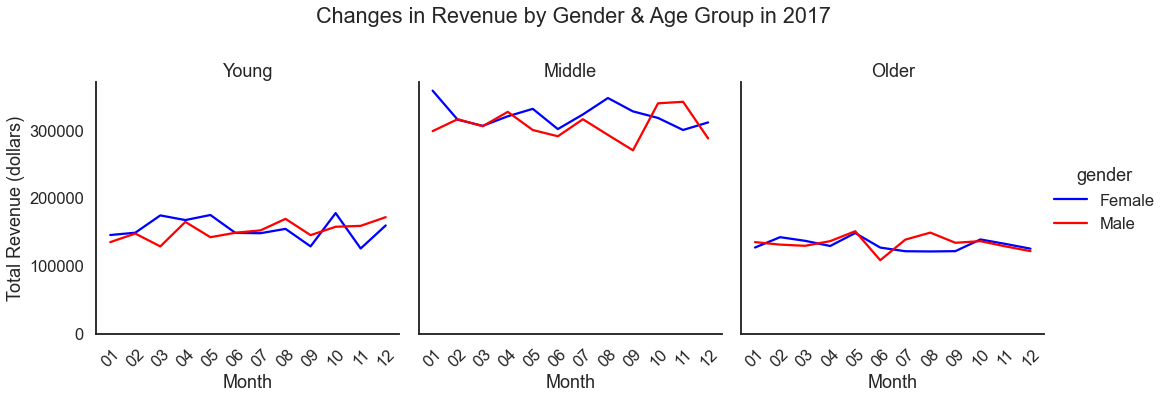

In [62]:
#line chart: changes in revenue per month in 2017 by gender & age group
sns.set_style("white")
sns.set_context("talk")
sns.set_palette({"Blue","Red"})
g1 =sns.relplot(data=df_full_dropna_all.sort_values(by="month"), x="month",y="list_price",kind="line",estimator="sum",style="gender",hue="gender",hue_order=["Female","Male"],ci=None,dashes=False,col="age_group")
g1.fig.suptitle("Changes in Revenue by Gender & Age Group in 2017", y=1.1,weight=10)
g1.set_titles("{col_name}")
g1.set(xlabel="Month",ylabel="Total Revenue (dollars)")
plt.ylim(bottom=0)

# plt.xticks(rotation=45)

for ax in g1.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
plt.show()

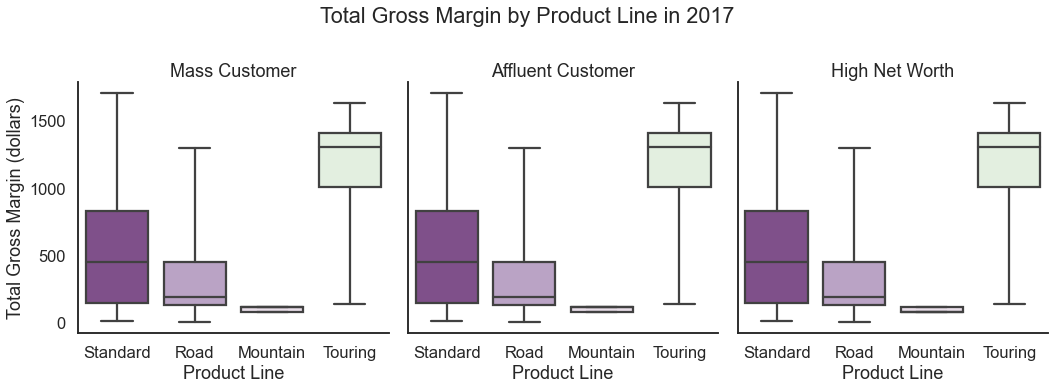

In [63]:
#box chart: total gross margin in different product line & wealth segment in 2017
sns.set_context("talk")
sns.set_palette("PRGn")
g2 =sns.catplot(data=df_full_dropna_all, x="product_line",y="gross_margin",kind="box",col="wealth_segment",whis=[0,100])
g2.fig.suptitle("Total Gross Margin by Product Line in 2017", y=1.1,weight=10)
g2.set(xlabel="Product Line",ylabel="Total Gross Margin (dollars)")
g2.set_titles("{col_name}")
plt.show()

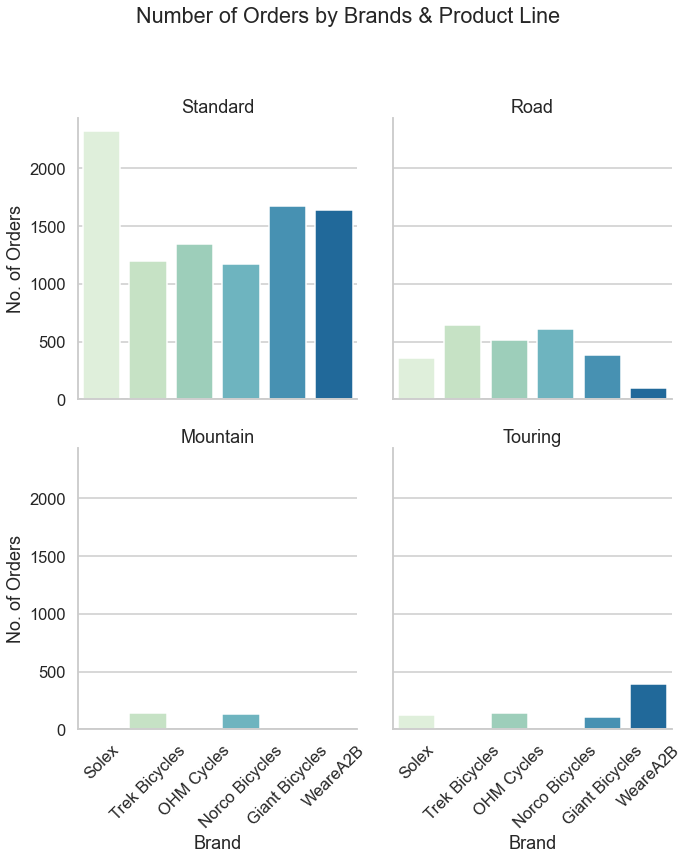

In [64]:
#count plot: Number of orders by brands & product line in 2017 (rotation xticks bị lỗi)
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("GnBu")
g3 =sns.catplot(data=df_full_dropna_all.drop_duplicates(), x="brand",kind="count",col="product_line",col_wrap=2)
g3.fig.suptitle("Number of Orders by Brands & Product Line", y=1.1,weight=10)
g3.set(xlabel="Brand",ylabel="No. of Orders")
g3.set_titles("{col_name}")

# plt.xticks(rotation=45)
for ax in g3.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
plt.show()

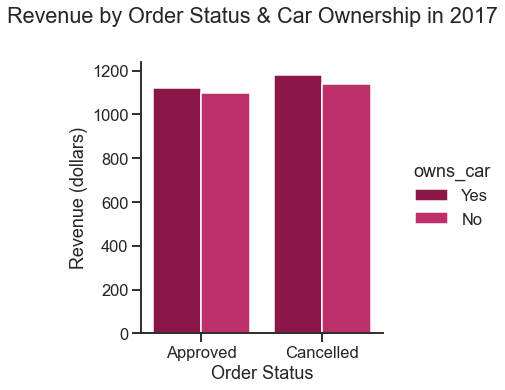

In [65]:
#bar plot: total gross margin by order status whether customer owns a car or not in 2017
sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("PuRd_r")
g4 =sns.catplot(data=df_full_dropna_all, x="order_status",y="list_price",kind="bar",hue="owns_car",ci=None)
g4.fig.suptitle("Revenue by Order Status & Car Ownership in 2017", y=1.1,weight=10)
g4.set(xlabel="Order Status",ylabel="Revenue (dollars)")
g4.set_titles("Online {col_name}")
plt.show()

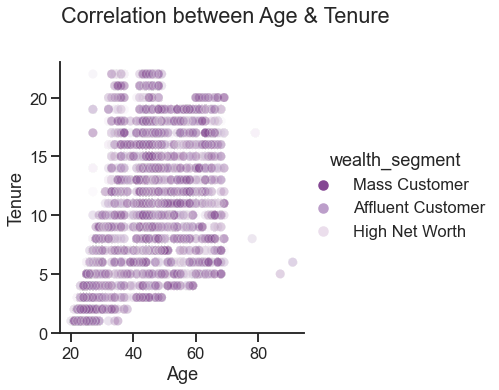

In [66]:
#scatter plot: correlation between age & tenure (numerical values)
sns.set_context("talk")
sns.set_style("ticks")
sns.set_palette("PRGn")
g5 =sns.relplot(data=df_full_dropna_all, x="age",y="tenure",kind="scatter",hue="wealth_segment",alpha=0.05)
g5.fig.suptitle("Correlation between Age & Tenure", y=1.1,weight=10)
g5.set(xlabel="Age",ylabel="Tenure")
plt.show()